Introduction  

In this project, I  I use the data set of The Indian Premier League (IPL) for all the Seasons (2008-2017)  
IPL follows the Twenty20 match format which is a form of limited overs cricket in that it involves two teams, each with a single innings, the key feature being that each team bats for a maximum of 20 overs. In such a format, the maximum overs a bowler can bowl is one-fifth of the total overs which comes to 4 overs per bowler for a full Twenty20 game. Each team has 10 wickets and 20 overs to play with. The team that scores the highest number of runs wins the game.   
The match gets completed when either:     
a) The chasing team surpasses the score of the team batting first.   
b) When the team batting second runs out of all the 10 wickets and fails to surpass the score of the team batting first.  
c) When the team batting second runs out of the 20 overs and fails to surpass the score of the team batting first



Definition of Column headings 

Data Set: Matches  

Toss Decision: A team can select to either bat or bowl first.  
DL Applied:  
Win By Runs: A win by runs occur when the team batting first wins the game. The difference between the team batting first and the team batting second is the win by runs for the team batting first.  
Win By Wickets: A win by wickets occur when the team batting second wins the game. The difference between the total wickets (10) and the number of wickets lost by the team batting second is the wins by wickets.   
Player Of Match: Man of the match awarded to the best player of the game.  



Data Set: Deliveries

Batting Team: The team that is batting.  
Bowling Team: The team that is bowling.  
Over: In cricket, an over is a set of six balls bowled from one end of a cricket pitch. In a normal over, a single bowler delivers six balls in succession, from one end of the pitch, to the batsman at the other end.   
Ball: Which ball of the given over. From 1-6.  
Batsman: The player batting.  
Non Striker: The batsman standing at the bowling end   
Bowler: The player bowling the ball for the over.  
Super Over: Whether the match goes to Super Over  
Wide Runs: A delivery that passes illegally wide of the wicket, scoring an extra for the batting side. A wide does not count as one of the six valid deliveries that must be made in each over – an extra ball must be bowled for each wide.  
Bye Runs: Extras scored in the same way as normal runs when the ball does not make contact with any part of the batsman (bat, protective gear, body)
Leg Bye Runs: Extras taken after a delivery hits any part of the body of the batsman other than the bat or the gloved hand that holds the bat. If the batsman makes no attempt to play the ball with the bat or evade the ball that hits him, leg byes may not be scored.  
No Ball Runs: an illegal delivery; the batting side is awarded one extra, the bowler must deliver another ball in the over, and the batsman cannot be dismissed by the bowler on a no-ball. Most usually a front-foot no-ball, in which the bowler oversteps the popping crease; other reasons include bowling a full toss above waist height (see beamer), throwing, having more than two fielders (excluding the wicketkeeper) behind square on the leg side, or breaking the return crease in the delivery stride.  
Penalty Runs: 5 penalty runs may be awarded for rarer breaches of the laws.  
Batsman Runs: Runs scored by the batsman in that ball  
Extra Runs: A run not attributed to any batsman; there are five types: byes, leg byes, penalties, wides and no-balls.  
Total Runs: Total runs combining the batsman runs and extras  
Player Dismissed: The batsman who got out.  
Dismissal Kind: The way in which the batsman gets dismissed(out). (Caught, Bowled, Run-Out, Hit-Wicket, LBW, Stumped, Caught & Bowled, Obstructing The Field, Retired Hurt) 
Fielder: The fielder who caught the ball that got the batsman dismissed.  

In this project, we have two Data Sets to begin with. The Matches Data Set provides us with the information of winner for each game throughout all the seasons. The Deliveries Data Set provides us with the information of ball-by-ball outcome for each game for all the seasons.  
Throughout the project,  
-I will apply some cleaning and additions to the data set.  
-Manipulate the Data sets to record the statistics of each batsman and bowler for every game across all the seasons.  
-Answer questions like who are the top 5 batsmen throughout the IPL? (based on highest runs across all seasons). Who are the Hard Hitter Batsmen? (Percentage of total runs scored through boundaries for each batsman- 4s & 6s and their Strike Rates). In what ways the batsmen get out the most? - A logical assumption for this would be "Caught" as batsmen look to hit boundaries often in Twenty20 games and thus are more likely to get out Caught in the field. Which bowler has taken the most number of wickets across all the seasons? Which bowler concedes the most extra?  
-Who has been the best player in the IPL?  
-Find out how the toss impacts the game by answering questions like, What is the win and loss % for the teams that win the toss? Performance of teams that win the toss for each season. What do teams that win the toss prefer to do each season? (Bat or Bowl). Which team is the most lucky? (Moss toss wins)  
-How hard is it to chase 200+ targets? All time high scores. Which teams have scored and conceded the most 200+ scores?  
-Predict the Batting and Bowling Averages of a set of random players for the 2018 IPL Season. Assuming all the players are playing. Where Batting Average = Total Runs/(no.of Innings - no.of NotOuts) and Bowling Average= (Total runs conceded) /(Total Wickets taken).  

Data Source: https://cricsheet.org  
Website for the project: https://prashraypatel.github.io/STA-141B-Project/

In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [147]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Some Cleaning and Additions

In a Season of an IPL tournament, each team plays twice with every other team, home and away game. In the playoffs, the top 4 teams advance through the qualifiers. The teams that end up in the 1st and 2nd spot get to play the Qualifier 1. The teams that end up in 3rd and 4th spot get to play the Eliminator. The Loser of the Qualifier 1 and the winner of the Eliminator get to play the Qualifier 2. Winner of this game advances to the final to compete with the winner of the Qualifier 1.  
To make things readable, I abbreviated all the team names.  
I have dropped the umpire 3 column since all of them have NaN values. 


In [148]:
matches["type"] = "pre-qualifier"
for year in range(2008, 2018):
   qualifiers_final = matches[matches['season']==year][-1:].index.values[0]
   matches = matches.set_value(qualifiers_final, "type", "Final")
   matches = matches.set_value(qualifiers_final-1, "type", "Qualifier 2")
   matches = matches.set_value(qualifiers_final-2, "type", "Eliminator")
   matches = matches.set_value(qualifiers_final-3, "type", "Qualifier 1")

matches.groupby(["type"])["id"].count()

#Replacing the Team Names with their abbreviations
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
deliveries.fillna(0,inplace=True)     #filling all the NaN values with 0
matches.columns = ["ID", "Season", "City", "Date", "Home Team", "Away Team", "Toss Winner", "Toss Decision", "Result", "DL Method", "Winner", "Win by Runs", "Win by Wickets", "MOM", "Venue", "Umpire 1", "Umpire 2","Match Type"]
deliveries.columns = ["Match ID", "Innings", "Batting Team", "Bowling Team", "Over(s)", "Ball(s)", "Batsman", "Non Striker", "Bowler", "Super Over", "Wide Runs","Bye Runs","Leg Bye Runs","No Ball Runs","Penalty Runs","Batsman Runs","Extra Runs","Total Runs","Player Dismissed", "Dismissal Kind", "Fielder"]

In [149]:
matches.head()

,ID,Season,City,Date,Home Team,Away Team,Toss Winner,Toss Decision,Result,DL Method,Winner,Win by Runs,Win by Wickets,MOM,Venue,Umpire 1,Umpire 2,Match Type
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,pre-qualifier
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,pre-qualifier
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,pre-qualifier
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,pre-qualifier
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,pre-qualifier


In [150]:
deliveries.head()

,Match ID,Innings,Batting Team,Bowling Team,Over(s),Ball(s),Batsman,Non Striker,Bowler,Super Over,...,Bye Runs,Leg Bye Runs,No Ball Runs,Penalty Runs,Batsman Runs,Extra Runs,Total Runs,Player Dismissed,Dismissal Kind,Fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


In [151]:
#Add team score and team extra columns for each innings.
score = deliveries.groupby(['Match ID', 'Innings'])['Total Runs'].sum().unstack().reset_index()
score.columns = ['Match ID', 'Home Team Score', 'Away Team Score', 'Home Team Super-Over Score', 'Away Team Super-Over Score']
Match_Records = pd.merge(matches, score, left_on = 'ID', right_on = 'Match ID', how = 'outer')

extras = deliveries.groupby(['Match ID', 'Innings'])['Extra Runs'].sum().unstack().reset_index()
extras.columns = ['Match ID', 'Home Team Extras', 'Away Team Extras', 'Home Team Super-Over Extras', 'Away Team Super-Over Extras']
Match_Records = pd.merge(Match_Records, extras, on = 'Match ID', how = 'outer')

columns = ['Match ID', 'Season','City','Date','Home Team','Away Team', 'Toss Winner', 'Toss Decision', 'Result', 'DL Method', 'Winner', 'Home Team Super-Over Score', 'Away Team Super-Over Score', 'Home Team Super-Over Extras', 'Away Team Super-Over Extras', 'Home Team Score', 'Away Team Score', 'Win by Runs', 'Win by Wickets', 'Home Team Extras', 'Away Team Extras', 'MOM', 'Venue', 'Umpire 1', 'Umpire 2', 'Match Type']
Match_Records = Match_Records[columns]
Match_Records.head()



,Match ID,Season,City,Date,Home Team,Away Team,Toss Winner,Toss Decision,Result,DL Method,...,Away Team Score,Win by Runs,Win by Wickets,Home Team Extras,Away Team Extras,MOM,Venue,Umpire 1,Umpire 2,Match Type
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,...,172.0,35,0,7.0,6.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,pre-qualifier
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,...,187.0,0,7,8.0,4.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,pre-qualifier
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,...,184.0,0,10,4.0,15.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,pre-qualifier
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,...,164.0,0,6,6.0,10.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,pre-qualifier
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,...,142.0,15,0,6.0,5.0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,pre-qualifier


Batting Match Records  



The MatchRecord_Batsmen Data Set records the statistics of each batsman for every game across all the seasons. We can find out the runs scored by the bastman, the number of balls faced, the number of boundaries hit (4s and 6s), the strike rate, dismissal kind and the fielder who caught the ball to dismiss the batsman.

In [152]:
MatchRecord_Batsmen2 = deliveries.groupby(["Match ID", "Innings", "Batting Team", "Batsman"])
MatchRecord_Batsmen = MatchRecord_Batsmen2["Batsman Runs"].sum().reset_index()

balls_faced = deliveries[deliveries["Wide Runs"] == 0]
balls_faced = balls_faced.groupby(["Match ID", "Innings", "Batsman"])["Batsman Runs"].count().reset_index()
balls_faced.columns = ["Match ID", "Innings", "Batsman", "balls_faced"]
MatchRecord_Batsmen = MatchRecord_Batsmen.merge(balls_faced, left_on=["Match ID", "Innings", "Batsman"], 
                        right_on=["Match ID", "Innings", "Batsman"], how="left")

four_runs = deliveries[ deliveries["Batsman Runs"] == 4]
six_runs = deliveries[ deliveries["Batsman Runs"] == 6]
four_runs_batsman = four_runs.groupby(["Match ID", "Innings", "Batsman"])["Batsman Runs"].count().reset_index()
six_runs_batsman = six_runs.groupby(["Match ID", "Innings", "Batsman"])["Batsman Runs"].count().reset_index()
four_runs_batsman.columns = ["Match ID", "Innings", "Batsman", "Fours"]
six_runs_batsman.columns = ["Match ID", "Innings", "Batsman", "Sixes"]

MatchRecord_Batsmen = MatchRecord_Batsmen.merge(four_runs_batsman, left_on=["Match ID", "Innings", "Batsman"], 
                        right_on=["Match ID", "Innings", "Batsman"], how="left")
MatchRecord_Batsmen = MatchRecord_Batsmen.merge(six_runs_batsman, left_on=["Match ID", "Innings", "Batsman"], 
                        right_on=["Match ID", "Innings", "Batsman"], how="left")
MatchRecord_Batsmen['SR'] = np.round(MatchRecord_Batsmen['Batsman Runs'] / MatchRecord_Batsmen['balls_faced'] * 100, 2)

for columns in ["Batsman Runs", "Fours", "Sixes", "balls_faced", "SR"]:
    MatchRecord_Batsmen[columns] = MatchRecord_Batsmen[columns].fillna(0)

out = deliveries[ pd.notnull(deliveries["Player Dismissed"])]
out = out[["Match ID", "Innings", "Player Dismissed", "Dismissal Kind", "Fielder"]]
out.rename(columns={"Player Dismissed": "Batsman"}, inplace=True)
MatchRecord_Batsmen = MatchRecord_Batsmen.merge(out, left_on=["Match ID", "Innings", "Batsman"], 
                        right_on=["Match ID", "Innings", "Batsman"], how="left")
MatchRecord_Batsmen = matches[['ID','Season']].merge(MatchRecord_Batsmen, left_on = 'ID', right_on = 'Match ID', how = 'left').drop('ID', axis = 1)
MatchRecord_Batsmen['Dismissal Kind']=MatchRecord_Batsmen['Dismissal Kind'].fillna('not out')
MatchRecord_Batsmen['Fielder']=MatchRecord_Batsmen.Fielder.fillna('-')
MatchRecord_Batsmen.head()


,Season,Match ID,Innings,Batting Team,Batsman,Batsman Runs,balls_faced,Fours,Sixes,SR,Dismissal Kind,Fielder
0,2017,1,1,SRH,BCJ Cutting,16,6.0,0.0,2.0,266.67,not out,-
1,2017,1,1,SRH,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh
2,2017,1,1,SRH,DJ Hooda,16,12.0,0.0,1.0,133.33,not out,-
3,2017,1,1,SRH,MC Henriques,52,37.0,3.0,2.0,140.54,caught,Sachin Baby
4,2017,1,1,SRH,S Dhawan,40,31.0,5.0,0.0,129.03,caught,Sachin Baby


Plot the performance of top 5 batsmen over seasons  


This data set provides us with the most runs scored by the batsmen across all the seasons. 
From this we find that Raina is the leading run scorer, followed by the Indian Team Captain Kohli, Sharma, Gambhir, and Warner.
We can see that Raina's progression has been steady across all the seasons while Kohli has scored the highest runs by a batsman in a particular season during 2016 which helped him to reach the 2nd spot in terms of the leading scorers. 

In [153]:
top_5_batsmen = MatchRecord_Batsmen.groupby(['Season', 'Batting Team', 'Batsman'])['Batsman Runs'].sum().reset_index()
top_5_batsmen = top_5_batsmen.groupby(['Season', 'Batsman'])['Batsman Runs'].sum().unstack().T
top_5_batsmen['Total'] = top_5_batsmen.sum(axis=1) 
top_5_batsmen = top_5_batsmen.sort_values(by = 'Total', ascending = False).drop('Total', 1)
top_5_batsmen.head()

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Batsman,,,,,,,,,,
SK Raina,421.0,434.0,528.0,438.0,441.0,548.0,523.0,374.0,399.0,442.0
V Kohli,165.0,246.0,307.0,557.0,364.0,639.0,359.0,505.0,973.0,308.0
RG Sharma,404.0,362.0,404.0,372.0,433.0,538.0,390.0,482.0,489.0,333.0
G Gambhir,534.0,286.0,277.0,378.0,590.0,406.0,335.0,327.0,501.0,498.0
DA Warner,NaN,163.0,282.0,324.0,256.0,410.0,528.0,562.0,848.0,641.0


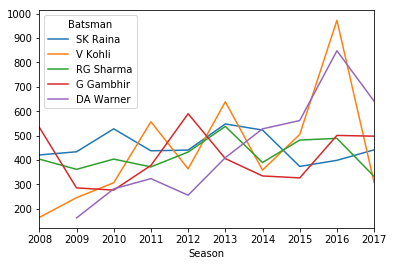

In [154]:
Top_5_batsmen_Progress = top_5_batsmen[:5].T.plot()
plt.show()

Hard Hitter Batsmen? Percentage of total runs scored through boundaries for each batsman.  



In this bar graph below, we can see the percentage of total runs scored in boundaries by the leading runs scorer in IPL. We can see that even though Raina is the leading run scorer, his boundaries percentage is pretty similar to the others. However, Gayle and Sehwag who are at 7th and 15th spot respectively have the highest runs scored by hitting 4s and 6s. 
If there was a scenario of a tie breaker (Super Over), I would ideally want Gayle and Sehwag in my team as those two are the most explosives batmen across all the seasons of the IPL.

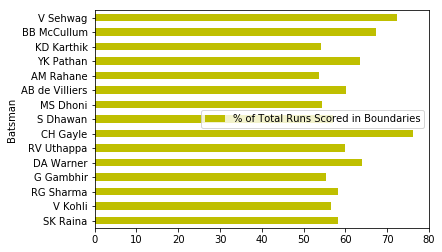

In [155]:
boundaries_runs = MatchRecord_Batsmen.groupby(['Batsman'])['Batsman Runs', 'Fours', 'Sixes'].sum().reset_index()
boundaries_runs['Boundaries'] = (boundaries_runs['Fours'] * 4) + (boundaries_runs['Sixes'] * 6)
boundaries_runs['% of Total Runs Scored in Boundaries'] = np.round(boundaries_runs['Boundaries'] / boundaries_runs['Batsman Runs'] * 100, 2)
boundaries_runs = boundaries_runs.sort_values(by = 'Batsman Runs', ascending = False)
boundaries_runs[:15].plot(x= 'Batsman', y = '% of Total Runs Scored in Boundaries', kind = 'barh', color='y')
plt.show()


Strike Rate of top batsmen.  



The data set below gives us the strike rate for the top scorers in IPL. We can see that Gayle and Sehwag have the highest strike rate. This makes sense as they score most of their runs by hitting boundaries rather than taking singles, doubles or triples.   
We can find out that in order to score a lot of runs, players need to have a mix of boundary hitting abilities as well as running between the wickets. If players rely soley on hitting boundaries, we can see their total runs are lower than those players who have a mix of both the talents.


In [156]:
Strike_Rate = MatchRecord_Batsmen.groupby(['Batsman'])['Batsman Runs', 'balls_faced'].sum().reset_index()
Strike_Rate['SR'] = np.round(Strike_Rate['Batsman Runs'] / Strike_Rate['balls_faced'] * 100, 2)
Strike_Rate = Strike_Rate.groupby(['Batsman']).sum().sort_values(by = 'Batsman Runs', ascending = False)[:15]
Strike_Rate

,Batsman Runs,balls_faced,SR
Batsman,,,
SK Raina,4548,3267.0,139.21
V Kohli,4423,3405.0,129.90
RG Sharma,4207,3214.0,130.90
G Gambhir,4132,3316.0,124.61
DA Warner,4014,2825.0,142.09
RV Uthappa,3778,2870.0,131.64
CH Gayle,3651,2409.0,151.56
S Dhawan,3561,2922.0,121.87
MS Dhoni,3560,2604.0,136.71


Most common dismissal type for top batsmen.  



In the Pie Chart below, we can see the ways in which the batsmen get dismissed. We find that 59.1% of the times the batsmen get dismissed by getting caught in the field. This would match our assumption as in a Twenty20 format, players tend to be more aggressive in order to hit lot more boundaries and thereby getting caught in the field. Therefore, if a batsman avoids hitting agressively in the air, he can reduce his risk of getting out by 59.1%.

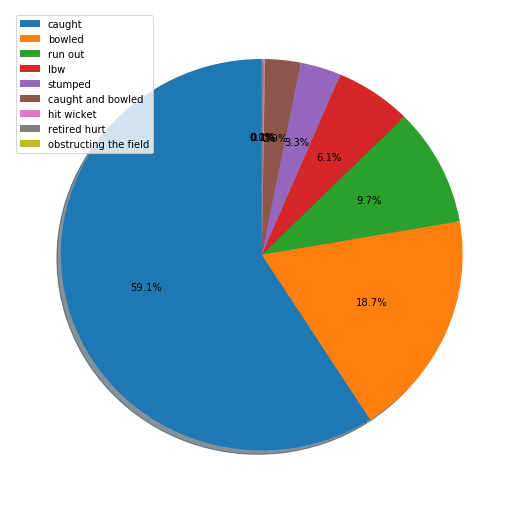

In [157]:
MatchRecord_Batsmen2=MatchRecord_Batsmen[MatchRecord_Batsmen['Dismissal Kind']!= "not out"]
MatchRecord_Batsmen2
out_batsman = MatchRecord_Batsmen2['Dismissal Kind'].value_counts()
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(9,9)
ax.pie(out_batsman, autopct='%1.1f%%', startangle=90, shadow = True)
ax.legend(loc='best', labels=out_batsman.index)
plt.show()

Bowling Match Records  



The MatchRecord_Bowler Data Set records the statistics of each bowler for every game across all the seasons. We can find out the overs bowled by the bowler, the number of wides and no balls bowled, the number of wickets taken, and the economy for a bowler.

In [158]:
MatchRecord_Bowler_2 = deliveries.groupby(["Match ID", "Innings", "Bowling Team", "Bowler", "Over(s)"])
MatchRecord_Bowler = MatchRecord_Bowler_2["Total Runs", "Wide Runs", "Bye Runs", "Leg Bye Runs", "No Ball Runs"].sum().reset_index()
MatchRecord_Bowler["Runs"] = MatchRecord_Bowler["Total Runs"] - (MatchRecord_Bowler["Bye Runs"] + MatchRecord_Bowler["Leg Bye Runs"])
MatchRecord_Bowler["Extras"] = MatchRecord_Bowler["Wide Runs"] + MatchRecord_Bowler["No Ball Runs"]

del( MatchRecord_Bowler["Bye Runs"])
del( MatchRecord_Bowler["Leg Bye Runs"])
del( MatchRecord_Bowler["Total Runs"])

Wicket_Type = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
Out = deliveries[deliveries["Dismissal Kind"].isin(Wicket_Type)]
Out = Out.groupby(["Match ID", "Innings", "Bowling Team", "Bowler", "Over(s)"])["Dismissal Kind"].count().reset_index()
Out.rename(columns={"Dismissal Kind": "Wickets"}, inplace=True)

MatchRecord_Bowler = MatchRecord_Bowler.merge(Out, left_on=["Match ID", "Innings", "Bowling Team", "Bowler", "Over(s)"], 
                        right_on=["Match ID", "Innings", "Bowling Team", "Bowler", "Over(s)"], how="left")
MatchRecord_Bowler["Wickets"] = MatchRecord_Bowler["Wickets"].fillna(0)
MatchRecord_Bowler3 = MatchRecord_Bowler.groupby(['Match ID', 'Innings', 'Bowling Team', 'Bowler'])['Over(s)'].count().reset_index()
MatchRecord_Bowler = MatchRecord_Bowler.groupby(['Match ID', 'Innings', 'Bowling Team', 'Bowler']).sum().reset_index().drop('Over(s)', 1)
MatchRecord_Bowler = MatchRecord_Bowler3.merge(MatchRecord_Bowler, on=["Match ID", "Innings", "Bowling Team", "Bowler"], how = 'left')
MatchRecord_Bowler['Economy'] = np.round(MatchRecord_Bowler['Runs'] / MatchRecord_Bowler['Over(s)'] , 2)
MatchRecord_Bowler = matches[['ID','Season']].merge(MatchRecord_Bowler, left_on = 'ID', right_on = 'Match ID', how = 'left').drop('ID', axis = 1)
MatchRecord_Bowler.head()


,Season,Match ID,Innings,Bowling Team,Bowler,Over(s),Wide Runs,No Ball Runs,Runs,Extras,Wickets,Economy
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,0.0,12.00
2,2017,1,1,RCB,SR Watson,3,0,0,41,0,0.0,13.67
3,2017,1,1,RCB,STR Binny,1,0,0,10,0,1.0,10.00
4,2017,1,1,RCB,TM Head,1,0,0,11,0,0.0,11.00


Extra runs conceded by bowlers


The data set below shows us the total extras bowled by a bowler in a season.   
We find that Malinga has bowled the highest numbers of extras across all the seasons evethough he did not play two seasons.   
Note: NP- Did not Play for the Season

In [159]:
Extra_Runs = MatchRecord_Bowler.groupby(['Season', 'Bowler'])['Extras'].sum().unstack().T
Extra_Runs['Total'] = Extra_Runs.sum(axis=1)
Extra_Runs.sort_values('Total', ascending = False, inplace = True)
Extra_Runs = Extra_Runs.fillna('NP')
Extra_Runs.head()

Season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Bowler,,,,,,,,,,,
SL Malinga,NP,31,24,22,19,15,9,19,NP,22,161.0
P Kumar,14,14,22,11,22,18,1,14,18,11,145.0
DW Steyn,24,5,29,13,10,22,6,2,1,NP,112.0
UT Yadav,NP,NP,10,5,18,20,15,15,7,16,106.0
I Sharma,21,16,11,11,NP,19,2,5,13,7,105.0


Player of the match

We find that Gayle has been awarded the most number of Man of the Matches. He is the same player who scores most of his runs through boundaries.  
We also find that all the players in the bar graph below are all batsmen. This shows that bowlers rarely get awarded Man of the Matches. No wonder people complain that Cricket is a Batsman's Game. Either the awarders are biased in favor towards the batsmen or the standards set for bowlers to win man of the matches awards are set too high in comparison to the batsmen.

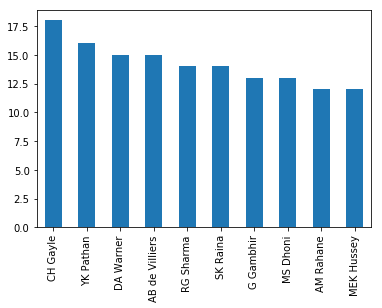

In [160]:
matches['MOM'].value_counts()[:10].plot(kind = 'bar')
plt.show()



Impact of toss on the match outcome

The graphs below show us result for teams that won the toss in each season.
Interestingly, we find that some teams have managed to win the gam,e after winning the toss a lot of times for a given season, while some of them have managed to lose a lot of games after winning the toss.

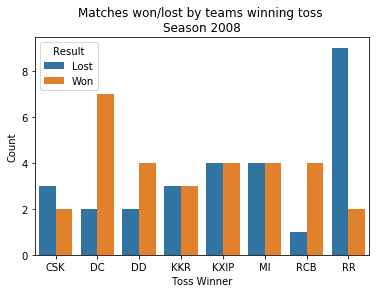

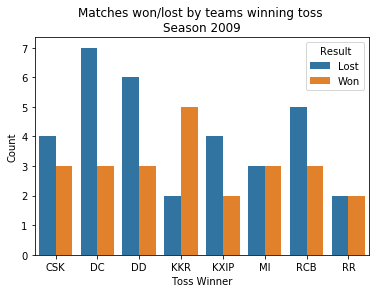

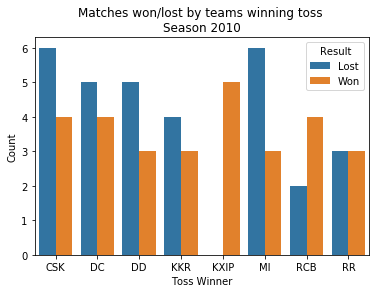

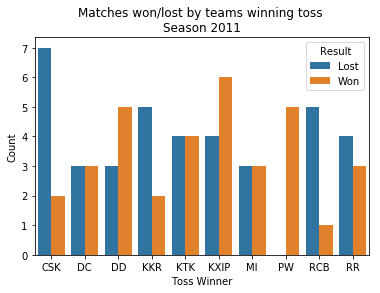

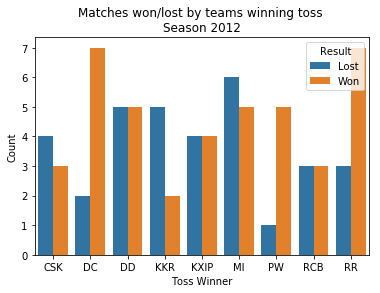

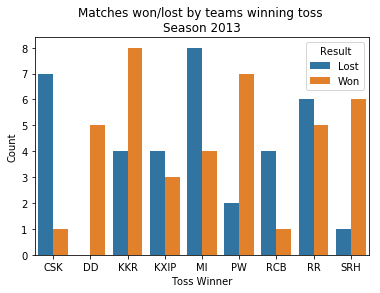

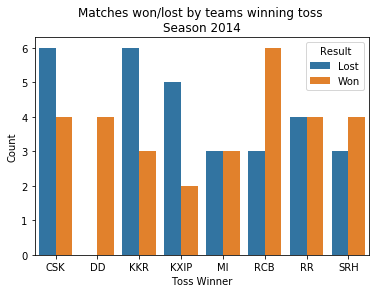

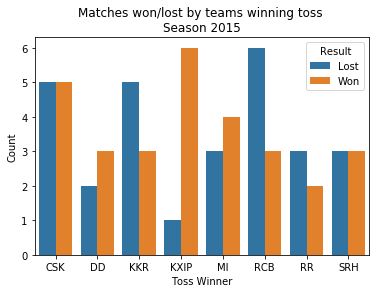

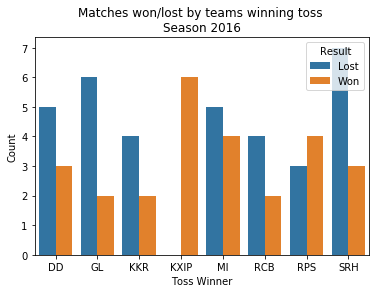

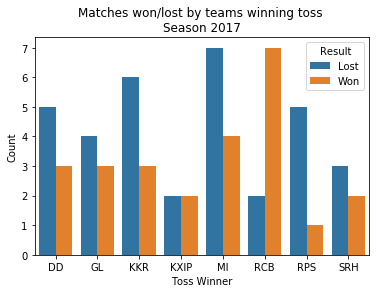

In [161]:
Toss = Match_Records.groupby(['Season', 'Toss Winner']).Winner.value_counts().reset_index(name = 'Count')
Toss['Result'] = np.where(Toss["Toss Winner"] == Toss["Winner"], 'Lost', 'Won')
Toss_BatBowl = Toss.groupby(['Season', 'Toss Winner','Result'])['Count'].sum().reset_index()

for year in range(2008, 2018, 1):
    Toss_BatBowl2 = Toss_BatBowl[Toss_BatBowl['Season'] == year]
    plot = sns.barplot(x="Toss Winner", y="Count", hue="Result", data=Toss_BatBowl2)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(year))
    plt.show()
    year+=1
    

The Pie Chart belows shows us the Win and Loss percentage for a team that won the toss. We find that after taking consideration to all the games for all the seasons, the win percentage is slightly higher than the loss percentage for a team that wins the toss. It shows us that winning the toss may be slightly beneficial to the team as that is what they were comfortable with doing. Also sometimes, conditions matter a little as well, sometimes it is beneficial for a team to bat first while sometimes it is better for a team to chase. Conditions such as the pitch, rain, dew factor have a slight effect to the game and may favor the team that exploits it. 

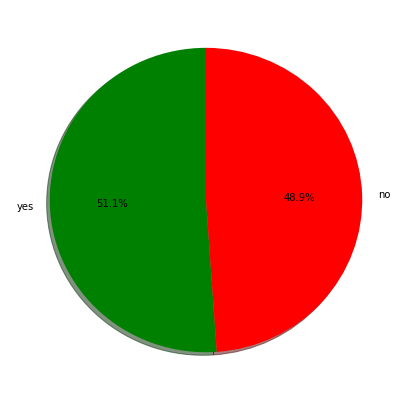

In [162]:
tmw=matches[matches['Toss Winner']==matches['Winner']]
slices=[len(tmw),(636-len(tmw))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Toss Decisions across Seasons

The Twenty20 format is relatively new to the cricket. It is an addition to the already exisiting 50 overs and the test cricket format. We can see as we progress through the seasons, teams are deciding to chase the target rather than setting a target. This is becuase the Twenty20 format is with reduced overs but with the same number of wickets (10) for each team as in other formats. Hence, when a team bats first, no target is safe to play with as the chasing team has an advantage of knowing the target to chase. Hence, if the target is smaller, they can play cautiously and chase it comfortably. On the other hand, if the target is big one, they can try attacking all out playing with a mentality of nothing to lose and may stand a chance of chasing it. This is why teams are preferring to chase often as it is harder for teams to protect their targets in such a short format.

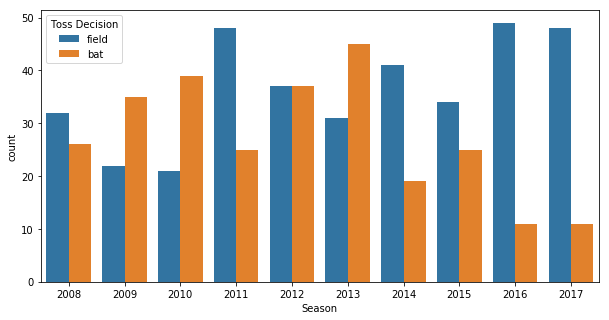

In [163]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Season',hue='Toss Decision',data=matches)
plt.show()

Which team is the lucky one? 

The bar plot below shows us the teams that have won the highest number of tosses across all the seasons. We see that Mumbai Indians has won the most number of tosses. However, from the previos graphs, we can see that Mumbai Indians (MI) have frequently lost games whenever that have the toss for most of the seasons. So, they might not be as lucky after all.

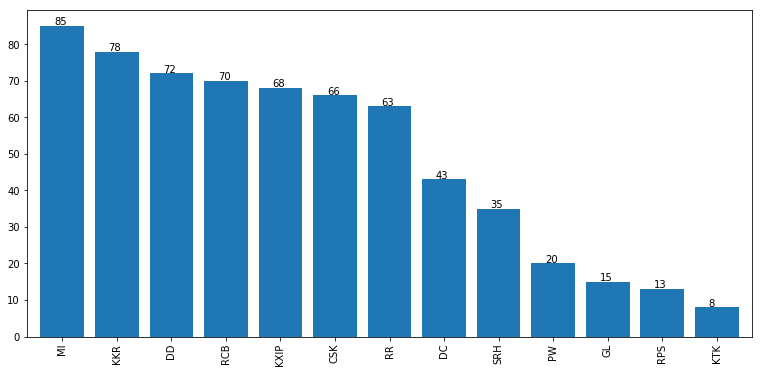

In [164]:
plt.subplots(figsize=(13,6))
tw=matches['Toss Winner'].value_counts().plot.bar(width=0.8)
for center in tw.patches:
    tw.annotate(format(center.get_height()), (center.get_x()+0.25, center.get_height()+0.25))
plt.show()

All Time High Score

We can see that Royal Challengers Bangalore (RCB) has set the highest score of 263 runs in 20 overs against Pune Warriors.  To get an idea of that score for a reader who doesn't watch cricket, 263 runs can be considered as an average score by a team in a 50 over format. Therefore, scoring 263 runs in 120 balls is an incredible achievement as teams manage to do that in 300 balls normally. Dark day to forget for Pune for sure.

In [165]:
top_scores=deliveries.groupby(['Match ID', 'Innings','Batting Team','Bowling Team'])['Total Runs'].sum().reset_index() 
top_scores=top_scores[top_scores['Total Runs']>=200]
top_scores.nlargest(10,'Total Runs')

,Match ID,Innings,Batting Team,Bowling Team,Total Runs
829,411,1,RCB,PW,263
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
100,50,1,KXIP,MI,230
1170,580,1,RCB,SRH,227


The display in the left shows us the batting teams that scored the most numbers of 200+ scores while the display in the right shows us the bowling teams that have conceded the most numbers of 200+ runs.  
We see that RCB has scored the highest numbers of 200+ scores while KXIP has conceded the highest numbers of 200+ scores. The player Gayle who has one of the highest strike rates and boundaries related runs plays for RCB. No wonder, they have managed to score multiple 200+ scores. 

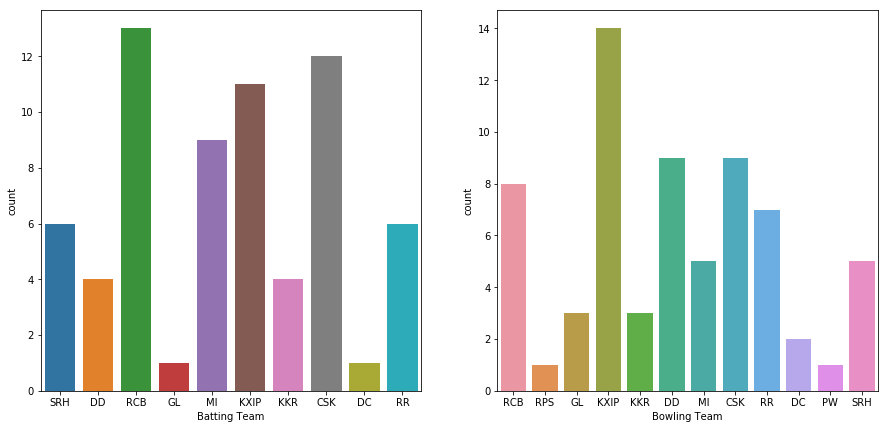

In [169]:
f, ax = plt.subplots(1,2)
sns.countplot(top_scores['Batting Team'],ax=ax[0])
sns.countplot(top_scores['Bowling Team'],ax=ax[1])
f=plt.gcf()
f.set_size_inches(15,7)
plt.show()

How hard is it to chase 200+ scores?

The Pie chart belows shows us that 14.3% of the times teams have succesfully chased targets of 200+ while 85.7% of the times they have failed. This shows us that, if you bat first and set a target of 200+, the team has a probability of 85.7% of winning the game. Hence, if the conditions are favoring batting, and the captain has chose a stronger batting side, it would be a wise choice to win the toss and bat first in an attempt to score 200+

In [170]:
#Data Set: Record of all the games that have had 200+ scores and whether the score was chased or not
top_scores=deliveries.groupby(['Match ID', 'Innings','Batting Team','Bowling Team'])['Total Runs'].sum().reset_index()
top_scores1=top_scores[top_scores['Innings']==1]
top_scores2=top_scores[top_scores['Innings']==2]
top_scores1=top_scores1.merge(top_scores2[['Match ID','Innings', 'Total Runs']], on='Match ID')
top_scores1.rename(columns={'Innings_x':'1st Innings','Innings_y':'2nd Innings','Total Runs_x':'1st Innings Runs','Total Runs_y':'2nd Innings Runs'},inplace=True)
top_scores1=top_scores1[top_scores1['1st Innings Runs']>=200]
top_scores1['Score_Chased']=1
top_scores1['Score_Chased'] = np.where(top_scores1['1st Innings Runs']<=top_scores1['2nd Innings Runs'], 
                                           'yes', 'no')
cut_pie=top_scores1['Score_Chased'].value_counts().reset_index().Score_Chased
list(cut_pie)
labels=['target not chased','target chased']
top_scores3 = top_scores1.drop(['1st Innings', '2nd Innings', 'Match ID'], axis=1)
top_scores3.head()


,Batting Team,Bowling Team,1st Innings Runs,2nd Innings Runs,Score_Chased
0,SRH,RCB,207,172,no
8,DD,RPS,205,108,no
19,RCB,GL,213,192,no
31,SRH,KXIP,207,181,no
35,SRH,KKR,209,161,no


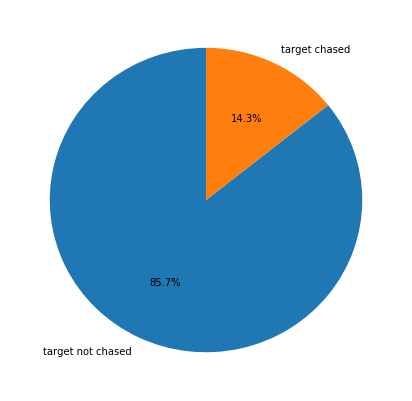

In [171]:
plt.pie(cut_pie,labels=labels,startangle=90,autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(7,7)
top_scores1.head()
plt.show()

2018 IPL Season Prediction


Prediction: Batting Average of batsmen for the upcoming season.

In [172]:
#Number of innings for a batsmen
innings=MatchRecord_Batsmen.groupby(['Innings','Batsman']).size().reset_index()
innings=innings.groupby(['Batsman']).sum().reset_index()
innings=innings.drop(['Innings'],1)
innings.rename(columns={0:'innings'},inplace=True)

print (innings.head(5))

          Batsman  innings
0  A Ashish Reddy       23
1      A Chandila        2
2        A Chopra        6
3     A Choudhary        3
4      A Flintoff        3


In [173]:
#Number of not outs for a batsmen
dismissal_group=MatchRecord_Batsmen[['Dismissal Kind','Batsman']]
dismissal_group=dismissal_group.groupby(['Batsman','Dismissal Kind']).size().reset_index()
dismissal_group.rename(columns={'0':'No_of_times'},inplace=True)
NotOuts=dismissal_group[dismissal_group['Dismissal Kind']=='not out']
NotOuts=NotOuts.drop(['Dismissal Kind'],1)
NotOuts.rename(columns={0:'Not Outs'},inplace=True) 
print (NotOuts.head(5))

           Batsman  Not Outs
2   A Ashish Reddy         8
4       A Chandila         2
10     A Choudhary         2
13      A Flintoff         1
16        A Kumble        12


A quick observation of the batting averages observation shows us that most of the batsmen average upto 30, some good batsmen have an average between 30-40, while some exceptionally well batsmen average 50 and above.

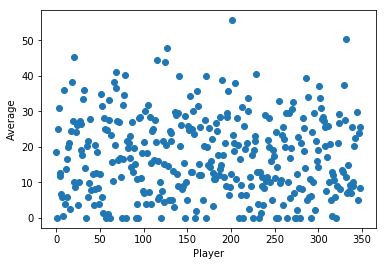

In [174]:
#Batting Average = Total Runs/(no.of Innings - no.of NotOuts)
batting_avg2=MatchRecord_Batsmen.groupby(['Batsman'] ).sum().reset_index()
batting_avg2=batting_avg2.drop(['Innings','Match ID'],1)
batting_avg=innings.merge(batting_avg2,on='Batsman')
batting_avg=batting_avg.merge(NotOuts,on='Batsman')
batting_avg['Batting Average']=batting_avg['Batsman Runs']/(batting_avg['innings']-batting_avg['Not Outs'])
batting_avg=batting_avg.replace([np.inf, -np.inf], 0)
batting_avg.rename(columns={'Batsman':'Player'},inplace=True)

l=list(range(len(batting_avg)))
plt.scatter(l,batting_avg['Batting Average'])
plt.xlabel('Player')
plt.ylabel('Average')
plt.show()


In [175]:
batting_avg.fillna(-999, inplace= True) #Fill -999 for players who have never batted
batting_avg.head()

,Player,innings,Season,Batsman Runs,balls_faced,Fours,Sixes,SR,Not Outs,Batting Average
0,A Ashish Reddy,23,46313,280,193.0,16.0,15.0,3163.94,8,18.666667
1,A Chandila,2,4025,4,7.0,0.0,0.0,66.67,2,0.000000
2,A Choudhary,3,6051,25,20.0,1.0,1.0,491.67,2,25.000000
3,A Flintoff,3,6027,62,53.0,5.0,2.0,367.70,1,31.000000
4,A Kumble,15,30136,35,47.0,3.0,0.0,1212.86,12,11.666667


Prediction: To predict the batting average for a batsmen for the next season, I have used Knn prediction. I have trained 90% of the data set and tested the reamining 10% of the data. The training and testing data set has been randomized. Finally, the factors that I took into consideration to predict the batting averages are number of innings, runs scored by batsmen, balls faced, number of fours, number of sixes, and number of not outs. We can see from the output that the prediction is pretty similar to their past batting averages.

In [207]:
#Batting Average Prediction
batting_avg["Batting Average"] = (batting_avg["Batting Average"]).astype(int)
X = batting_avg.drop(['Player', 'Batting Average', 'Season'], axis=1)
y = np.asarray(batting_avg['Batting Average'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.1)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The Knn Score is:")
knn.score(X_test, y_test)



The Knn Score is:


0.028571428571428571

In [208]:
print("Batting Average of 35 random batsmen for 2018 Season Prediction")
knn.predict(X_test)



Batting Average of 35 random batsmen for 2018 Season Prediction


array([ 0,  4, 11, 22,  0, 25, 10, 28,  0, 22, 14, 28,  8,  7, 24, 29, 15,
       28, 14, 15,  9, 10, 28,  0, 28, 15, 24, 24, 28, 28, 15, 11, 14,  9,
        3])

In [209]:
print("Batting Average of those 35 batsmen across all the seasons")
y_test

Batting Average of those 35 batsmen across all the seasons


array([ 0,  2,  6, 10, 12, 33, 20, 20, 12, 11, 21, 27, 20, 10, 28, 32, 14,
       39, 19, 36,  6, 12, 33,  5, 39, 22, 25, 31, 29, 37, 17, 16, 18,  8,
       12])

Prediction: Bowling Average of bowlers for the upcoming season.

In [179]:
#bowlers
bowlers=deliveries[['Ball(s)','Bowler','Extra Runs','Total Runs','Player Dismissed','Dismissal Kind','Fielder']]
#Overs
overs=bowlers.groupby(['Bowler','Ball(s)']).size().reset_index()
overs.rename(columns={0:'no_of_each_balls'},inplace=True)
overs['Total Balls']=0
   
for o in range(0,len(overs)):
    if overs["Ball(s)"].iloc[o]==1:
        overs['Total Balls'].iloc[o] = overs['no_of_each_balls'].iloc[o]+overs['no_of_each_balls'].iloc[o+1]+overs['no_of_each_balls'].iloc[o+2]+overs['no_of_each_balls'].iloc[o+3]+overs['no_of_each_balls'].iloc[o+4]+overs['no_of_each_balls'].iloc[o+5]

/Users/prashraypatel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
#runs conceded by the bowler
conceded_runs=bowlers.groupby(['Bowler','Total Runs']).size().reset_index()
conceded_runs.rename(columns={0:'Runs Conceded'},inplace=True)
conceded_runs['Total Runs Conceded']=0
conceded_runs['Total Runs Conceded'] = ((conceded_runs['Runs Conceded'])*(conceded_runs['Total Runs']))
conceded_runs=conceded_runs[['Bowler','Total Runs Conceded']]
conceded_runs=conceded_runs.groupby(['Bowler']).sum().reset_index()
conceded_runs.head()

,Bowler,Total Runs Conceded
0,A Ashish Reddy,400
1,A Chandila,245
2,A Choudhary,144
3,A Flintoff,106
4,A Kumble,1089


Highest Wicket Takes across all the seasons

Malinga has had the highest numbers of wicket takes across all the seasons. Interestingly, Malinga is also the same bowler who has bowled the highest numbers of extras across all the seasons.

In [181]:
#wickets
wickets=bowlers[['Bowler','Dismissal Kind']]
wickets=wickets.dropna()
wickets=wickets[wickets["Dismissal Kind"] != 0 ]
wickets=wickets.groupby(['Bowler']).size().reset_index()
wickets.rename(columns={0:'Total Wickets'},inplace=True)
wickets.sort_values(by="Total Wickets", ascending = False, inplace = True)
wickets.head()


,Bowler,Total Wickets
259,SL Malinga,170
5,A Mishra,142
80,DJ Bravo,137
107,Harbhajan Singh,136
204,PP Chawla,133


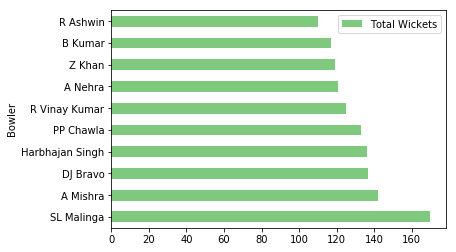

In [182]:
wickets[:10].plot(x= 'Bowler', y = 'Total Wickets', kind = 'barh', colormap = 'Accent')
plt.show()

In [183]:
#Bowling Average= (Total runs conceded) / (Total Wickets taken)
bowling_average=conceded_runs.merge(wickets,on='Bowler',how='left')
bowling_average['Bowling Average']=bowling_average['Total Runs Conceded']/bowling_average['Total Wickets']

#Economy = Total Runs conceded / Overs   
eco=conceded_runs.merge(overs,on='Bowler',how='left')
eco=eco[eco["Total Balls"] != 0]
eco=eco[['Bowler','Total Balls','Total Runs Conceded']]
eco['overs']=eco['Total Balls']/6
eco['Economy']=eco['Total Runs Conceded']/eco['overs']

bowling_avg=wickets.merge(bowling_average[['Bowler','Total Runs Conceded','Bowling Average']], on='Bowler',how='left')
bowling_avg=bowling_avg.merge(eco[['Bowler','Total Balls','Economy','overs']],on='Bowler',how='left')
bowling_avg.rename(columns={'Bowler':'Player'},inplace=True)
bowling_avg.fillna(-9999, inplace= True)




In [184]:
bowling_avg.head()

,Player,Total Wickets,Total Runs Conceded,Bowling Average,Total Balls,Economy,overs
0,SL Malinga,170,3034,17.847059,2559,7.113716,426.500000
1,A Mishra,142,3305,23.274648,2639,7.514210,439.833333
2,DJ Bravo,137,2815,20.547445,2018,8.369673,336.333333
3,Harbhajan Singh,136,3453,25.389706,2919,7.097636,486.500000
4,PP Chawla,133,3315,24.924812,2564,7.757410,427.333333


Prediction: To predict the bowling average for a bowler for the next season, I have used Knn prediction. I have trained 90% of the data set and tested the reamining 10% of the data. The training and testing data set has been randomized. Finally, the factors that I took into consideration to predict the bowling averages are total wickets, total runs conceded, total balls bowled, economy of the bowler, and total overs bowled. We can see from the output that the prediction is pretty similar to their past batting averages.

In [185]:
#Bowling Average Prediction
bowling_avg["Bowling Average"] = (bowling_avg["Bowling Average"]).astype(int)
X2 = bowling_avg.drop(['Player', 'Bowling Average'], axis=1)
y2 = np.asarray(bowling_avg['Bowling Average'])
X2_train, X2_test,y2_train, y2_test = cross_validation.train_test_split(X2,y2, test_size=0.1)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
print("The Knn Score is:")
knn.score(X2_test, y2_test)



The Knn Score is:


0.0

In [186]:
print("Bowling Average of random 32 bowlers for 2018 Season Prediction")
knn.predict(X2_test)



Bowling Average of random 32 bowlers for 2018 Season Prediction


array([26, 24, 30, 27, 23, 50, 16, 20, 21, 29, 14, 16, 21, 22, 23, 21, 19,
       21, 86, 21, 23, 24, 50, 22, 27, 22, 20, 26, 37, 10, 21, 29])

In [187]:
print("Bowling Average of those 32 bowlers across all the seasons.")
y2_test


Bowling Average of those 32 bowlers across all the seasons.


array([21, 31, 32, 25, 26, 28, 22, 16, 74, 18, 24, 19, 25, 31, 21, 22, 24,
       31, 44, 34, 14, 20, 39, 36, 25, 21, 30, 25, 26, 34, 63, 14])